### Environment Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

### Data Exploration

In [41]:
#Download and extract the data
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/jupyter/.fastai/data/mnist_sample')

In [42]:
#transforms = tfms
tfms = get_transforms(do_flip=False) # we do not flip the image(number)

### Factory methods

If you quickly want to get a ImageDataBunch and train a model, you should process your data to have it in one of the formats the following functions handle.
- from_folder
- from_csv
- from_df
- from_name_func
- from_name_re

#### from_folder

from_folder: Create from imagenet style dataset in path with train,valid,test subfolders (or provide valid_pct).

In [43]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24)

In [44]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_sample/train'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/valid'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/models'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/labels.csv')]

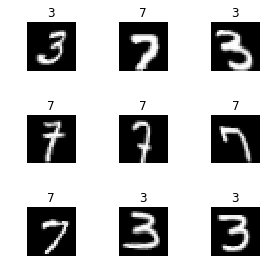

In [45]:
data.show_batch(rows=3, figsize=(4,4))

#### from_csv

from_csv: Create from a csv file in path/csv_labels.

In [53]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_sample/train'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/valid'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/models'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/labels.csv')]

In [58]:
data = ImageDataBunch.from_csv(path, ds_tfms = tfms, size = 28)

In [61]:
data.classes

[0, 1]

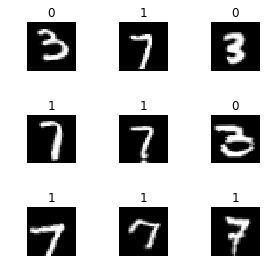

In [62]:
data.show_batch(rows=3, figsize=(4,4))

#### from_df

from_df : Create from a DataFrame df.

In [63]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [64]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

#### from_name_re

from_name_re: Create from list of fnames in path with re expression pat.

In [27]:
fn_path = [path/name for name in df['name']]
fn_path[:5]

[PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/21102.png'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/31559.png'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/46882.png'),
 PosixPath('/home/jupyter/.fastai/data/mnist_sample/train/3/26209.png')]

In [20]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_path, pat = pat, ds_tfms = tfms, size = 24)
data.classes

['3', '7']

#### from_name_func

from_name_func: Create from list of fnames in path with label_func.

In [70]:
data = ImageDataBunch.from_name_func(path, fn_path, ds_tfms = tfms, size = 24, 
                     label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

#### from_lists

from_lists: Create from list of fnames in path.

In [56]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_path]
labels[:5]

['3', '3', '3', '3', '3']

In [30]:
data = ImageDataBunch.from_lists(path, fn_path, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

### Training

In [71]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy) #using ResNet 18
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.160886,0.074580,0.972973,00:12
1,0.107438,0.042768,0.986486,00:12


### Result

In [72]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

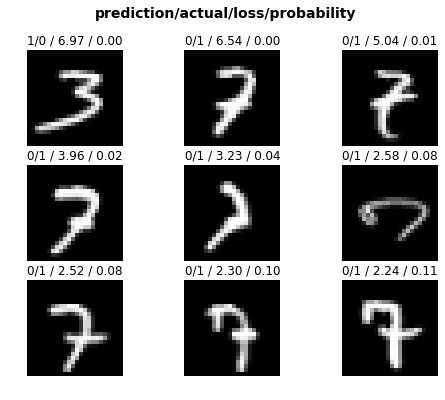

In [67]:
interp.plot_top_losses(9, figsize=(8,6))

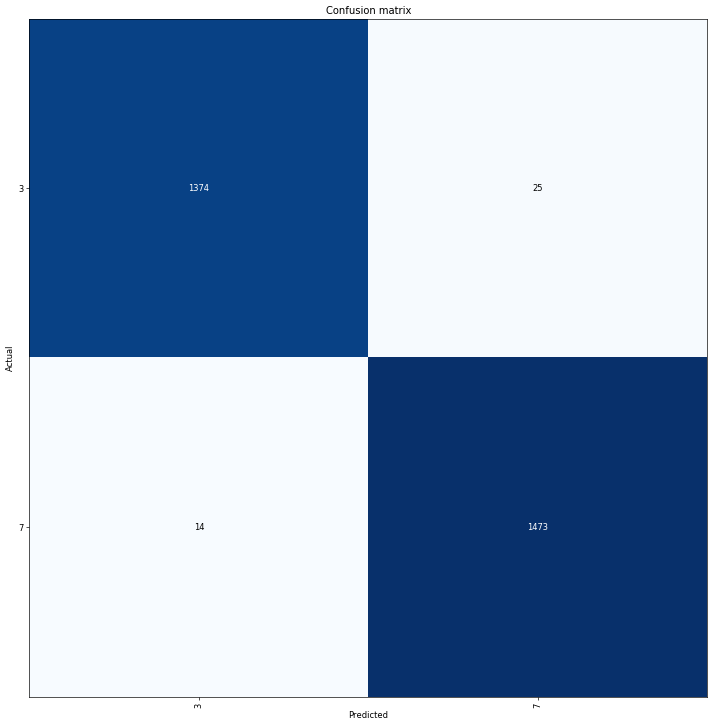

In [73]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [74]:
interp.most_confused()

[('3', '7', 25), ('7', '3', 14)]